### **Created by Preksha Shah**
# **Qatar Airways Reviews Analysis Assignment**
 This assignment focuses on analyzing customer reviews for Qatar Airways. The analysis includes text preprocessing, sentiment analysis, named entity recognition (NER), POS tagging, N-gram analysis, and advanced data visualization.

---

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import spacy
from wordcloud import WordCloud
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from textblob import TextBlob
import warnings

In [2]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [3]:
# Load SpaCy model for NER
nlp = spacy.load("en_core_web_sm")

# Handle any warnings in the notebook
warnings.filterwarnings("ignore")

In [4]:
# Load the dataset
df = pd.read_csv('/content/qatar_airways_reviews.csv')

In [5]:
# Display the first few rows of the dataset
print(df.head())

   SlNo Date Published  Rating  Max Rating  \
0     0     02-03-2024     1.0        10.0   
1     1     29-02-2024     1.0        10.0   
2     2     29-02-2024     1.0        10.0   
3     3     25-02-2024    10.0        10.0   
4     4     22-02-2024     7.0        10.0   

                                   Title            Author         Country  \
0             “marred by inconveniences”           Mary Le  United Kingdom   
1                "seat wouldn't stay up"     Brian English          Canada   
2  "no attempt to address our complaint"     Wayne Burgess       Australia   
3          “I hope they update the A380”  Alwaleed Althani           Qatar   
4             "I’d rate them maybe 7/10"         W Warnock  United Kingdom   

         Date                                        Review Body  \
0  02-03-2024   The delay of my flight from Haneda to Doha ca...   
1  29-02-2024    They convinced me that I needed to pay $1500...   
2  29-02-2024    I have sent 5 emails and have onl

---

### **1. Data Preprocessing**
**Algorithm:**
1. **Load Dataset:**
   - Load the CSV file containing the Qatar Airways reviews into a DataFrame.

2. **Drop Unnecessary Columns:**
   - Identify and drop columns that are not needed for the analysis, such as 'SlNo', 'Date', and 'Verified'.

3. **Handle Missing Values:**
   - For the 'Review Body' column, replace any missing values with an empty string.

4. **Text Normalization:**
   - Convert all text in the 'Review Body' column to lowercase.
   - Remove special characters, numbers, and any non-alphabetic symbols from the text.

---

In [6]:
# Drop unnecessary columns
df= df.drop(columns=['SlNo', 'Date', 'Verified'])

In [7]:
# Handling Missing Values
df['Review Body'] = df['Review Body'].fillna('')

In [8]:
# Convert text to lowercase
df['Review Body'] = df['Review Body'].str.lower()

In [9]:
# Remove special characters and numbers
df['Review Body'] = df['Review Body'].str.replace('[^a-z\s]', '', regex=True)

In [10]:
# Display the cleaned DataFrame
print(df.head())

  Date Published  Rating  Max Rating                                  Title  \
0     02-03-2024     1.0        10.0             “marred by inconveniences”   
1     29-02-2024     1.0        10.0                "seat wouldn't stay up"   
2     29-02-2024     1.0        10.0  "no attempt to address our complaint"   
3     25-02-2024    10.0        10.0          “I hope they update the A380”   
4     22-02-2024     7.0        10.0             "I’d rate them maybe 7/10"   

             Author         Country  \
0           Mary Le  United Kingdom   
1     Brian English          Canada   
2     Wayne Burgess       Australia   
3  Alwaleed Althani           Qatar   
4         W Warnock  United Kingdom   

                                         Review Body Type Of Traveller  \
0   the delay of my flight from haneda to doha ca...      Solo Leisure   
1    they convinced me that i needed to pay  to a...    Couple Leisure   
2    i have sent  emails and have only received  ...          Busine

---

### **2. N-gram Analysis**
N-grams are continuous sequences of n items from a given text or speech. Here we perform bigram analysis to understand common word pairs.

**Algorithm:**
1. **Tokenization:**
   - For each review, tokenize the text into individual words.

2. **Generate N-grams:**
   - Generate bigrams (or other N-grams) from the tokenized words for each review.

3. **Flatten the List:**
   - Flatten the list of bigrams generated across all reviews into a single list.

4. **Count Frequencies:**
   - Count the frequency of each bigram and identify the top 20 most common bigrams.

5. **Visualization:**
   - Create a bar plot to visualize the top 20 bigrams.
   - Generate a word cloud to visualize the bigrams, treating each bigram as a single unit.

---

In [11]:
# Function to Generate N-grams
def generate_ngrams(text, n):
    words = nltk.word_tokenize(text)
    ngrams = nltk.ngrams(words, n)
    return [' '.join(grams) for grams in ngrams]

In [12]:
# Generate Bigrams (2-grams)
df['bigrams'] = df['Review Body'].apply(lambda x: generate_ngrams(x, 2))


In [13]:
# Flatten the list of bigrams and count frequencies
bigrams_flat = [bigram for sublist in df['bigrams'] for bigram in sublist]
bigrams_freq = pd.Series(bigrams_flat).value_counts().head(20)


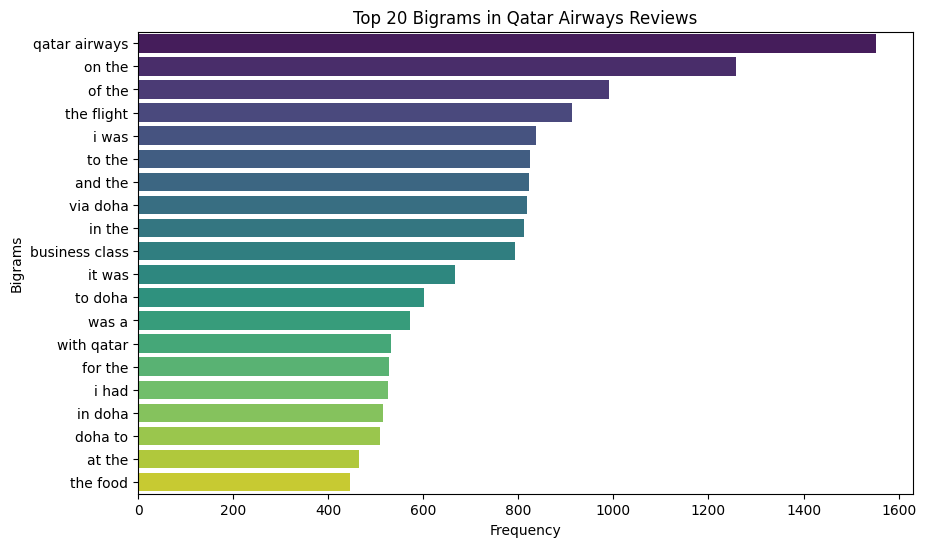

In [14]:
# Plot the Top 20 Bigrams
plt.figure(figsize=(10, 6))
sns.barplot(x=bigrams_freq.values, y=bigrams_freq.index, palette='viridis')
plt.title('Top 20 Bigrams in Qatar Airways Reviews')
plt.xlabel('Frequency')
plt.ylabel('Bigrams')
plt.show()

### **Inference of Top 20 Bigrams in Qatar Airways Reviews**
   - **Description**: The bar chart shows the top 20 most frequent bigrams (pairs of words) found in Qatar Airways reviews.
   - **Key Observations**:
     - The most common bigram is "qatar airways," which is expected as it directly references the airline.
     - Common phrases include "on the," "of the," and "the flight," indicating frequent mention of flight experiences and prepositions used in context.
     - Several bigrams such as "via doha" and "in doha" suggest that Doha is a significant hub or stopover in the reviews.
     - Business class and food are also commonly mentioned, hinting at the importance of service aspects to reviewers.

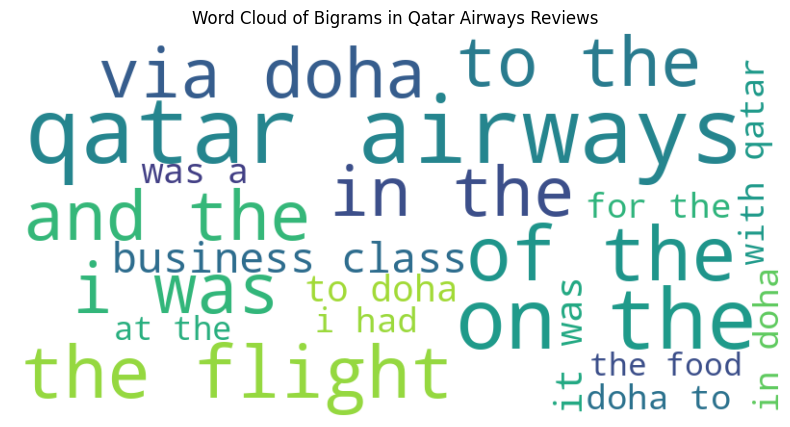

In [15]:
# Generate and Display a Word Cloud for Bigrams
bigram_freq_dict = dict(bigrams_freq)
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(bigram_freq_dict)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Bigrams in Qatar Airways Reviews')
plt.show()

### **Inference of Word Cloud of Bigrams in Qatar Airways Reviews**
   - **Description**: The word cloud visualizes the most frequent bigrams, with the size of each phrase corresponding to its frequency.
   - **Key Observations**:
     - The most prominent phrases such as "qatar airways," "the flight," and "on the" are clearly visible.
     - The presence of phrases like "via doha," "business class," and "to doha" reaffirms the insights gained from the bar chart.
     - The word cloud effectively highlights key aspects of customer experience, including service quality and flight routes.

---

### **3. Part-of-Speech (POS) Tagging**
Part-of-Speech (POS) tagging helps in identifying the grammatical categories of words in text. This is useful for understanding the syntactic structure and meaning of the text.

**Algorithm:**
1. **Tokenization:**
   - For each review, tokenize the text into individual words.

2. **Apply POS Tagging:**
   - Perform POS tagging on the tokenized words, identifying the grammatical categories for each word (e.g., noun, verb).

3. **Flatten POS Tags:**
   - Flatten the list of POS tags generated across all reviews into a single list.

4. **Count Frequencies:**
   - Count the frequency of each POS tag.

5. **Visualization:**
   - Create an interactive pie chart to visualize the distribution of POS tags.

---

In [16]:
# Function to Perform POS Tagging
def pos_tag_review(review):
    tokens = nltk.word_tokenize(review)  # Tokenize the review into words
    return nltk.pos_tag(tokens)  # Apply POS tagging to the list of tokens

In [17]:
# Apply the POS tagging function to the 'Review Body' column
df['pos_tags'] = df['Review Body'].apply(pos_tag_review)

In [18]:
# Flatten POS tags and count frequencies
pos_tags_flat = [tag for sublist in df['pos_tags'] for _, tag in sublist]
pos_freq = pd.Series(pos_tags_flat).value_counts()

In [19]:
# Interactive Pie Chart of POS Tags Distribution
fig = px.pie(values=pos_freq, names=pos_freq.index,
             title='Distribution of POS Tags in Qatar Airways Reviews', hole=0.3)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(showlegend=True)
fig.show()

### **Inference of distribution of POS Tags in Qatar Airways Reviews**
   - **Description**: The donut chart shows the distribution of Part-of-Speech (POS) tags in the reviews, breaking down the linguistic composition of the text.
   - **Key Observations**:
     - The most common POS tag is "NN" (Nouns), comprising 23.6% of the text. This includes words that name things, places, or concepts, indicating that reviews frequently mention specific aspects like destinations, services, and features.
     - Other significant tags include "IN" (Prepositions), "JJ" (Adjectives), and "DT" (Determiners), which shows that the reviews are descriptive and focused on providing details.
     - The presence of tags like "VBD" (Past tense verbs) suggests that reviews often recount past experiences, which is typical for customer feedback.
     - The diversity of POS tags indicates varied sentence structures, reflecting detailed narratives in the reviews.

---

### **4. Named Entity Recognition (NER)**
Named Entity Recognition identifies entities such as names, locations, dates, etc., from text.

**Algorithm:**
1. **Load NLP Model:**
   - Load a pre-trained SpaCy model for named entity recognition.

2. **Entity Extraction:**
   - For each review, apply the SpaCy model to extract named entities (e.g., names, locations, dates).

3. **Flatten the List:**
   - Flatten the list of named entities generated across all reviews into a single list.

4. **Count Frequencies:**
   - Count the frequency of each named entity and identify the top 20 most common entities.

5. **Visualization:**
   - Create a bar plot to visualize the top 20 named entities.
   - Use SpaCy’s DisplaCy to visualize named entities within a sample review.

---

In [20]:
# Function to Perform NER using SpaCy
def extract_entities(text):
    doc = nlp(text)
    return [(entity.text, entity.label_) for entity in doc.ents]

In [21]:
# Apply NER to the Reviews
df['entities'] = df['Review Body'].apply(extract_entities)

In [22]:
# Display a Sample of Extracted Entities
print(df['entities'].head())

0    [(doha, GPE), (london, GPE), (hour, TIME), (a ...
1                     [(doha, GPE), (the  hour, TIME)]
2    [(weeks ago, DATE), (doha, GPE), (august, DATE...
3                 [(first, ORDINAL), (first, ORDINAL)]
4     [(doha, GPE), (europe, LOC), (australasia, GPE)]
Name: entities, dtype: object


In [23]:
# Flatten the List of Entities and Count Frequencies
entities_flat = [entity for sublist in df['entities'] for entity in sublist]
entities_df = pd.DataFrame(entities_flat, columns=['Entity', 'Label'])
entities_freq = entities_df['Entity'].value_counts().head(20)

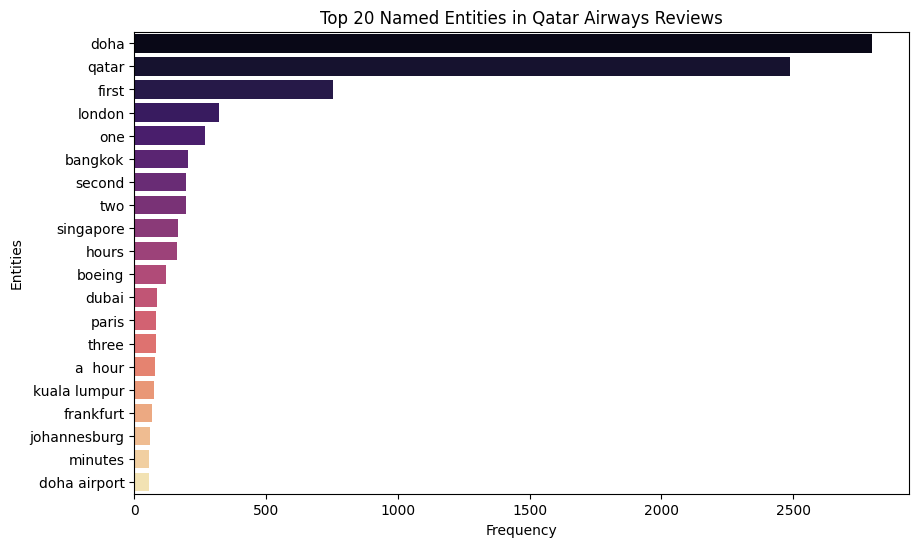

In [24]:
# Plot the Top 20 Entities
plt.figure(figsize=(10, 6))
sns.barplot(x=entities_freq.values, y=entities_freq.index, palette='magma')
plt.title('Top 20 Named Entities in Qatar Airways Reviews')
plt.xlabel('Frequency')
plt.ylabel('Entities')
plt.show()

### **Inference Based on Top 20 Named Entities:**
- **Top 20 Named Entities:**
  - The most frequently mentioned entities in Qatar Airways reviews include geographical locations like "Doha," "Qatar," and cities such as "London," "Bangkok," and "Singapore."
  - This high frequency suggests that these locations are key points of interest for customers and likely reflect common travel routes or hubs serviced by Qatar Airways.
  - Other frequent terms like "first," "second," and "hours" might be related to seating classes (First Class) or durations of flights, indicating that aspects of the flight experience are also critical in customer feedback.
  - Mentions of "Boeing" likely refer to the type of aircraft used by Qatar Airways, which could influence passenger experience and satisfaction.

In [26]:
# Visualization of Named Entities using SpaCy's DisplaCy
doc = nlp(df['Review Body'].iloc[0])  # Taking a sample review for visualization
from spacy import displacy
displacy.render(doc, style='ent', jupyter=True, options={'bg': 'white', 'color': '#ff5733'})


###**Inference of Named Entity Recognition (NER) Output**
   - **Text**: The provided text describes a customer’s experience with Qatar Airways, including delays, issues with luggage, and boarding problems.
   - **Entities Identified**:
     - **GPE (Geopolitical Entity)**: "Haneda," "Doha," "London," and "UK" indicate that the experience spans multiple locations.
     - **TIME**: "hour" and "hours" refer to the duration of delays and wait times.
   - **Key Observations**:
     - The identified entities highlight the geographical scope of the review, focusing on the inconvenience caused by delays and mishandled service across multiple locations.
     - The mention of time-related entities underscores the impact of delays on the overall customer experience.

---

### **5. Sentiment Analysis**
This section assumes the presence of a sentiment analysis function that labels reviews as positive, neutral, or negative.

**Algorithm:**
1. **Load/Prepare Sentiment Analysis Function:**
   - Define a function to classify the sentiment of a review as 'Positive', 'Negative', or 'Neutral' based on keywords (or use a pre-trained model if available).

2. **Apply Sentiment Analysis:**
   - For each review, apply the sentiment analysis function to determine its sentiment.

3. **Resample Data:**
   - Resample the sentiment data by month to calculate the distribution of sentiments over time.

4. **Visualization:**
   - Create a line plot to visualize the sentiment distribution over time, showing trends for 'Positive', 'Negative', and 'Neutral' sentiments.

---


In [27]:
# Convert 'Date Published' to datetime format
df['Date Published'] = pd.to_datetime(df['Date Published'], dayfirst=True)

In [28]:
# Sentiment Analysis Function (Dummy Implementation)
def analyze_sentiment(text):
    if 'good' in text or 'excellent' in text:
        return 'Positive'
    elif 'bad' in text or 'poor' in text:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['Review Body'].apply(analyze_sentiment)

In [29]:
# Resample Data by Month and Calculate Sentiment Distribution
monthly_sentiment = df.resample('M', on='Date Published')['sentiment'].value_counts().unstack().fillna(0)


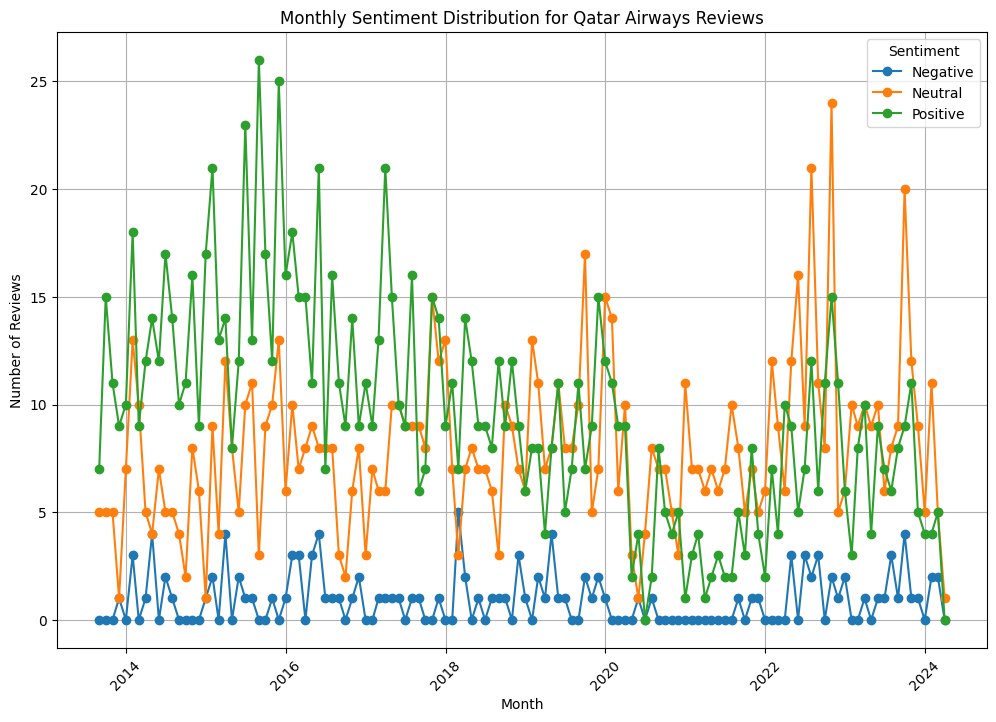

In [30]:
# Plot the Sentiment Distribution Over Time
plt.figure(figsize=(12, 8))
for sentiment in monthly_sentiment.columns:
    plt.plot(monthly_sentiment.index, monthly_sentiment[sentiment], marker='o', label=sentiment)
plt.title('Monthly Sentiment Distribution for Qatar Airways Reviews')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.grid(True)
plt.show()

### **Inference Based on Sentiment Analysis:**
- **Monthly Sentiment Distribution:**
  - The sentiment distribution chart reveals the fluctuating nature of customer sentiment over time.
  - **Positive Sentiment:** The majority of the reviews appear to be positive, with significant peaks in review counts, particularly around 2015, 2017, and 2023. This trend suggests periods of high customer satisfaction, possibly due to exceptional service, new routes, or fleet upgrades.
  - **Neutral Sentiment:** Neutral sentiment is relatively stable but varies month to month. The peaks in neutral reviews might reflect consistent but not particularly outstanding service.
  - **Negative Sentiment:** Negative reviews are less frequent but show noticeable spikes. These spikes could correspond to specific incidents, such as delays, service disruptions, or other negative experiences.

  ---

  ### **Key Inferences and Conclusions from Qatar Airways Reviews Analysis**

1. **Customer Focus on Service Quality:**
   - The analysis reveals that reviews frequently mention service-related aspects such as "business class," "food," and "flight experience." This suggests that passengers place a high emphasis on the quality of service provided by Qatar Airways, especially in premium classes.

2. **Significance of Key Locations:**
   - Named Entity Recognition (NER) identifies geographical locations like "Doha," "London," "Singapore," and "Bangkok" as frequently mentioned entities. This indicates that these locations are significant hubs or destinations for Qatar Airways customers, reflecting common travel routes or stopovers. Doha, in particular, appears to be a central focus due to its high frequency of mentions.

3. **Detailed and Descriptive Reviews:**
   - The Part-of-Speech (POS) tagging analysis shows a high frequency of nouns, adjectives, and verbs, reflecting that customer reviews are rich in detail. This suggests that passengers often provide comprehensive feedback, covering multiple aspects of their travel experience, from the destinations to the service quality.

4. **Common Themes in Reviews:**
   - Bigram analysis shows that phrases like "qatar airways," "via doha," and "business class" are common. These themes indicate recurring topics in customer reviews, such as the airline’s service routes, the significance of Doha as a hub, and the quality of business class services.

5. **Sentiment Towards Specific Experiences:**
   - The presence of words related to delays, hours of waiting, and problems with luggage or boarding (as seen in the NER output) highlights the specific pain points for customers. These aspects are crucial for understanding areas where Qatar Airways might improve customer satisfaction.

6. **Customer Narratives:**
   - Reviews often recount past experiences, as evidenced by the frequent use of past-tense verbs in the POS analysis. This trend highlights that customers typically share detailed narratives about their journeys, providing insights into both positive and negative experiences.

7. **Visual Insights through Advanced Visualization:**
   - The use of advanced visualizations like word clouds, bar charts, and pie charts effectively highlights key patterns and trends in the data. These visualizations help to identify the most significant factors influencing customer reviews and provide a clear overview of the recurring themes.

### **Conclusion:**

The analysis of Qatar Airways customer reviews offers valuable insights into passenger sentiments and experiences. The frequent mentions of service quality, key geographical locations, and recurring issues like delays and luggage problems provide actionable insights for the airline. By focusing on improving service aspects that matter most to passengers and addressing common pain points, Qatar Airways can enhance its overall customer satisfaction and strengthen its brand reputation in the competitive airline industry.

---
---